# Loan Trader Demonstration

In [1]:
import Agents.Loan as Loan
import Agents.LoanInvestor as LoanInvestor
import Agents.LoanTrader as LoanTrader
import matplotlib.pyplot as plt

# Setting up a universe of loans and investors

The general goal here will be to demonstrate the process for a trade to clear step by step with a loan that the trader is holding for sale. 

### Creating the setup for loans to start trading

We will start with a universe in which there are a number of investors and a fewer number of loans

In [2]:
num_loans = 50
num_investors = 10


# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]
trader = LoanTrader.LoanTraderObj()

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)
    
# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)

loans_for_sale = [loan for loan in loans_list if loan.current_owner == "no owner"]
loans_for_sale.extend([Loan.LoanObj() for _ in range(1)])

trader.update_loans_for_sale(loans_for_sale)

In [3]:
for investor in investors_list:
    investor.update(cycle = 1)

trader.run_auction(show_bids=True)

Investor Idbae bids 99.30311675527447 for loan 9c97a
Investor I6570 bids 99.30311675527447 for loan 9c97a
Investor Ia717 bids 99.30311675527447 for loan 9c97a
Investor Ic238 bids 99.30311675527447 for loan 9c97a
Investor I005c bids 99.30311675527447 for loan 9c97a
Investor Idba3 bids 99.30311675527447 for loan 9c97a
Investor Iab9b bids 99.30311675527447 for loan 9c97a
Investor Iddf4 bids 99.30311675527447 for loan 9c97a
Investor I58e5 bids 99.30311675527447 for loan 9c97a
Investor I350a bids 99.30311675527447 for loan 9c97a
Purchased:  True
Top bidder is Idbae with bid price 99.30311675527447 for $730222.0806980686
Loan Ownership History:  ['no owner', 'T400c5169-95c6-42b2-9321-66714197e43d', 'Idbae6f37-e1cf-49a4-8e6d-efe6d1eb3517']


## Showing the clearing process for the loan to transfer ownership

In [4]:
trader.collect_loans_for_sale(print_outputs=True)
trader.run_auction(show_bids=True)

Trader T4ebd has 3 loans for sale.
Investors with loans listed:  ['I17ef', 'I6936', 'Ic6de']
Loans for sale:  ['77526', '1c957', 'f2233']
Investor I6936 bids 99.5983004741422 for loan 77526
Investor I2aff bids 99.56127224599871 for loan 77526
Investor I28f5 bids 99.57401184845558 for loan 77526
Investor I0b4d bids 99.55462128353979 for loan 77526
Investor I681b bids 99.57299546619053 for loan 77526
Investor Ic6de bids 99.61622848356147 for loan 77526
Investor I6c47 bids 99.56105365387201 for loan 77526
Investor I2048 bids 99.5503593970529 for loan 77526
Investor I972e bids 99.52686477172227 for loan 77526
Purchased:  True
Top bidder is Ic6de with bid price 99.61622848356147 for $4604131.353160164
Loan Ownership History:  ['no owner', 'I17ef715e-bc5f-436b-89d0-d9169ffcab0a', 'Ic6de7e49-4661-41e6-a94f-94b693131eab']
Investor I17ef bids 99.62998973004225 for loan 1c957
Investor I2aff bids 99.57739737036852 for loan 1c957
Investor I28f5 bids 99.58959998374539 for loan 1c957
Investor I0b4d 

In [5]:
print([loan.id[:5] for loan in trader.loans_for_sale])

[]


# Looking at the Last Loan For Sale

In [6]:
loans_for_sale[-1].as_dict()

{'id': 'f2233e90-4150-4591-b1aa-419b20ac1c74',
 'maturity': 48,
 'current_cycle': 0,
 'starting_cycle': 0,
 'ending_cycle': 48,
 'time_to_maturity': 48,
 'pd': 0.0046354730296245105,
 'size': 3978938.5803554007,
 'base_interest_rate': 0.014311376100298593,
 'interest_rate': 0.014311376100298593,
 'fair_value': 101.16855226828852,
 'market_price': 99.9551912340065,
 'current_owner': <Agents.LoanInvestor.LoanInvestorObj at 0x153e33010>,
 'maturity_bool': False,
 'fair_value_history': [101.16855226828852],
 'market_price_history': [101.16855226828852,
  99.96144210299956,
  99.9551912340065],
 'ownership_history': ['no owner',
  'T4ebd3f87-4b63-41d1-b56c-a03290212fe4',
  'Ic6de7e49-4661-41e6-a94f-94b693131eab',
  'I69369953-bcc0-47dc-b969-edcfc9670f74'],
 'sale_price_history': [101.16855226828852,
  99.96144210299956,
  99.9551912340065],
 'reserve_price': 79.96915368239965,
 'defaulted': False,
 'recovery_value': 40}

## Trading Loans Between Investors
The trader will have the ability to collect the loans for sale from investors and then run an auction to sell the loans. We'll use a similar set up from above and a limited pool of investors as a demonstration.

In [7]:
num_loans = 1
num_investors = 500
trader = LoanTrader.LoanTraderObj(max_investors=500)


# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)
    
# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)

In [8]:
for _ in range(100):     
    trader.collect_loans_for_sale(print_outputs=False, num_investors = 500)
    trader.run_auction(show_bids=False)

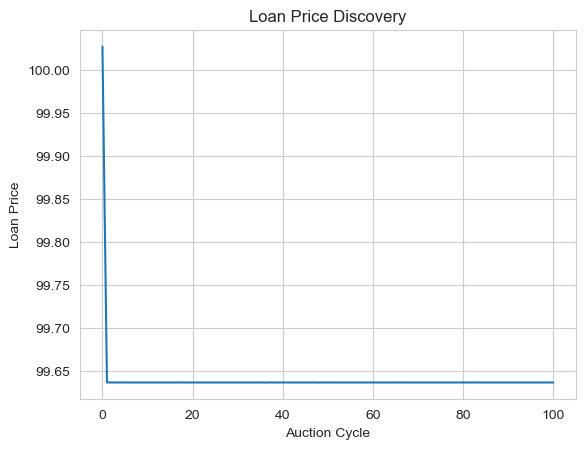

In [9]:
# plot to show loan price discovery in this universe of investors
plt.plot([loan.market_price_history for loan in loans_list][0])
plt.title("Loan Price Discovery")
plt.xlabel("Auction Cycle")
plt.ylabel("Loan Price")
plt.show()


From the plot above, we can see how there is eventially an ideal price that the loan will eventually reach after getting auctioned a number of times to match the most ideal investor for that particular loan based on it's score and the max bid. The idea of a reserve price allows this disovery to happen in a way that is not too costly for the originaly seller creating this slow decline type effect. 

## Adding in Multiple Loans

Below we see how price discovery becomes more complex for an individual loan when investors have a built portfolio. This is all under the assumption of a release at the initial cycle where no loans are updated until maturity. 

In [10]:
num_loans = 100
num_investors = 50
trader = LoanTrader.LoanTraderObj(max_investors=500)


# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj(target_score_param=0.2) for _ in range(num_investors)]

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)
    
# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)

In [11]:
for _ in range(100):     
    trader.collect_loans_for_sale(print_outputs=False, num_investors = 25)
    trader.run_auction(show_bids=False)

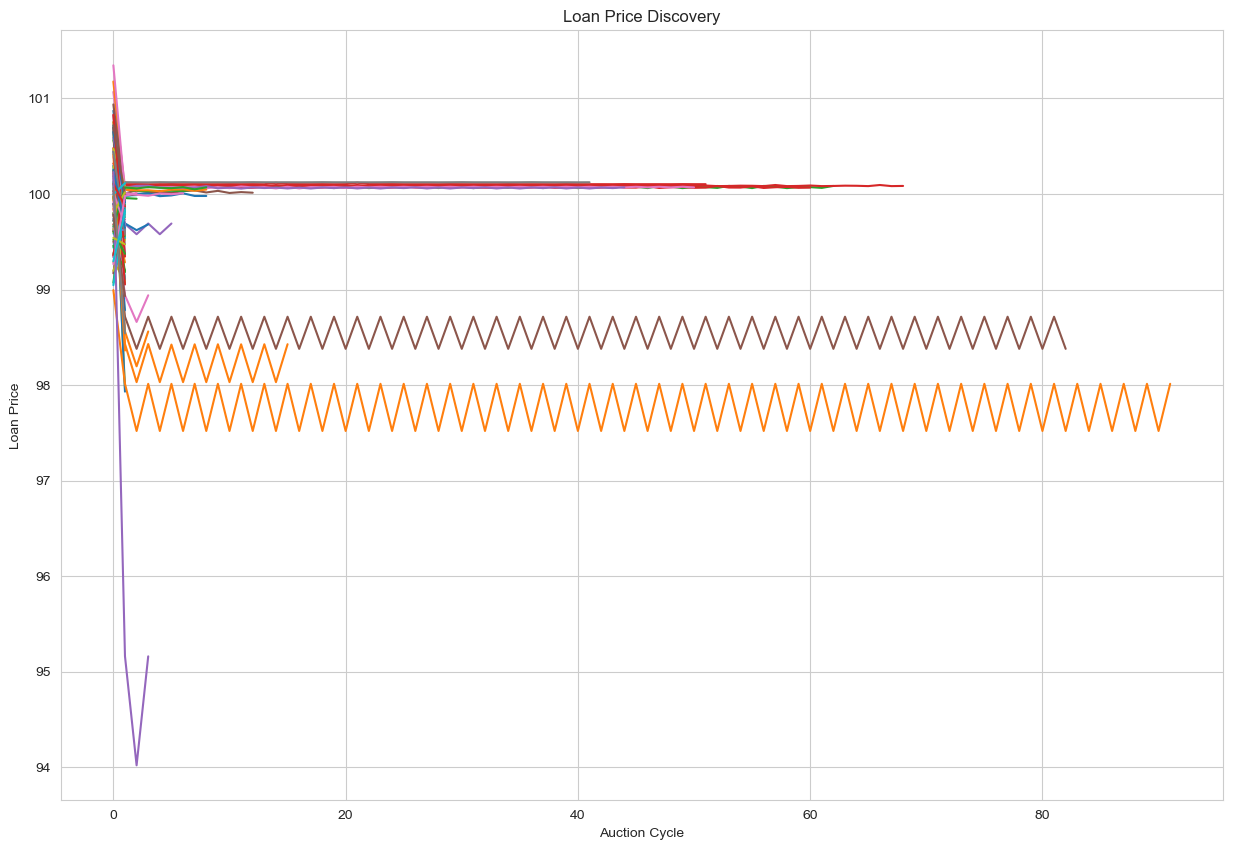

In [12]:
# Plotting
plt.figure(figsize=(15, 10))

# Plot each sublist as a separate line in the line plot
for i, sublist in enumerate([loan.market_price_history for loan in loans_list]):
    plt.plot(sublist, label=f'Series {i+1}')

plt.title("Loan Price Discovery")
plt.xlabel("Auction Cycle")
plt.ylabel("Loan Price")
plt.show()

### Adding in Loan Updates

This is the most basic implementation of the entire loan market in which prices are discovered and loans are able to mature. In this case there is only one trader and 1000 loans across 25 investors. The plot below shows how the market price for loans changes over the course of the simulation. The market price is reflected as the most recent high bid for a loan that goes up for sale. 

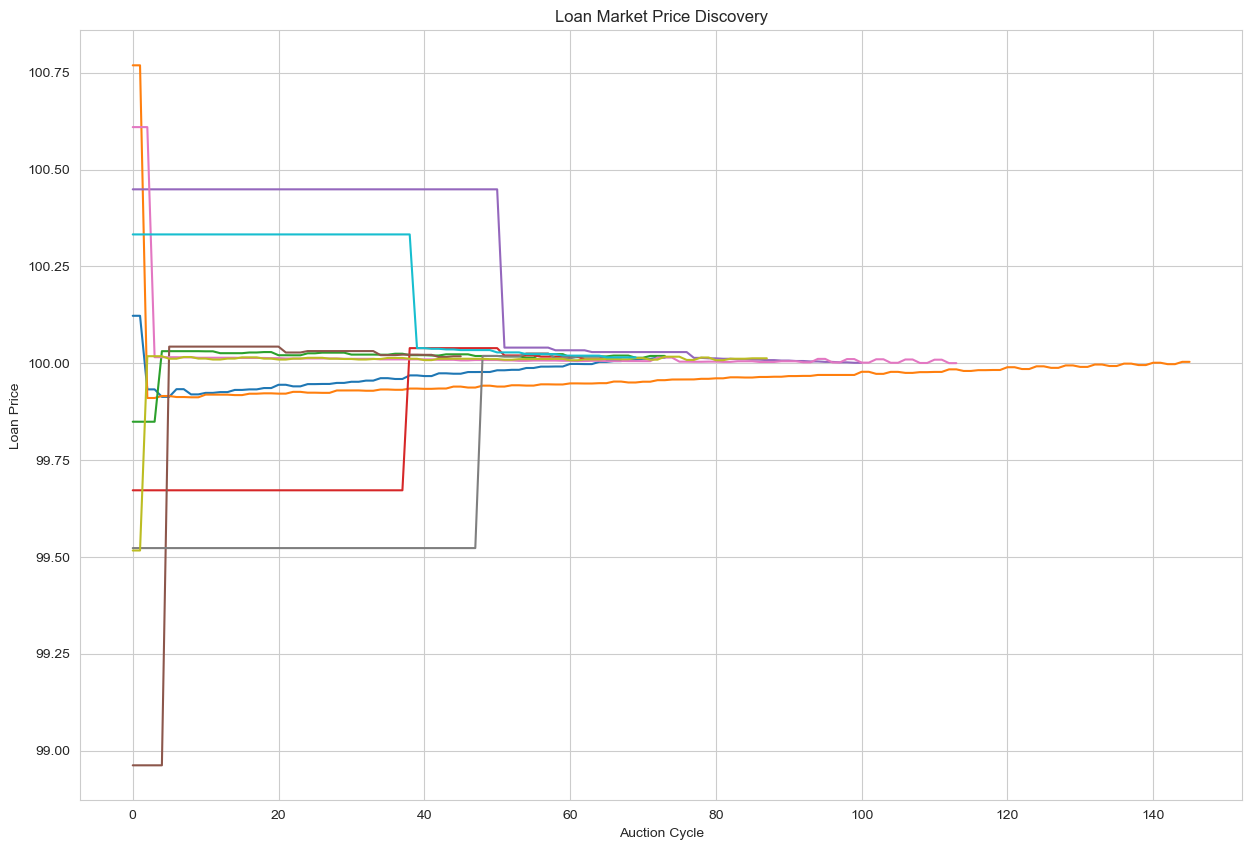

In [13]:
import Agents.Loan

num_loans = 10
num_investors = 25
trader = LoanTrader.LoanTraderObj(max_investors=500)

# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)

# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)
for _ in range(200):
    for investor in investors_list:
        investor.update(cycle=_)
    for loan in loans_list:
        loan.update(current_cycle=_)
    
    trader.update(cycle=_, num_investors=25)

# Plotting
plt.figure(figsize=(15, 10))

# plotting each loans market price history
for loan in loans_list:
    plt.plot(loan.market_price_history)

plt.title("Loan Market Price Discovery")
plt.xlabel("Auction Cycle")
plt.ylabel("Loan Price")
plt.show()

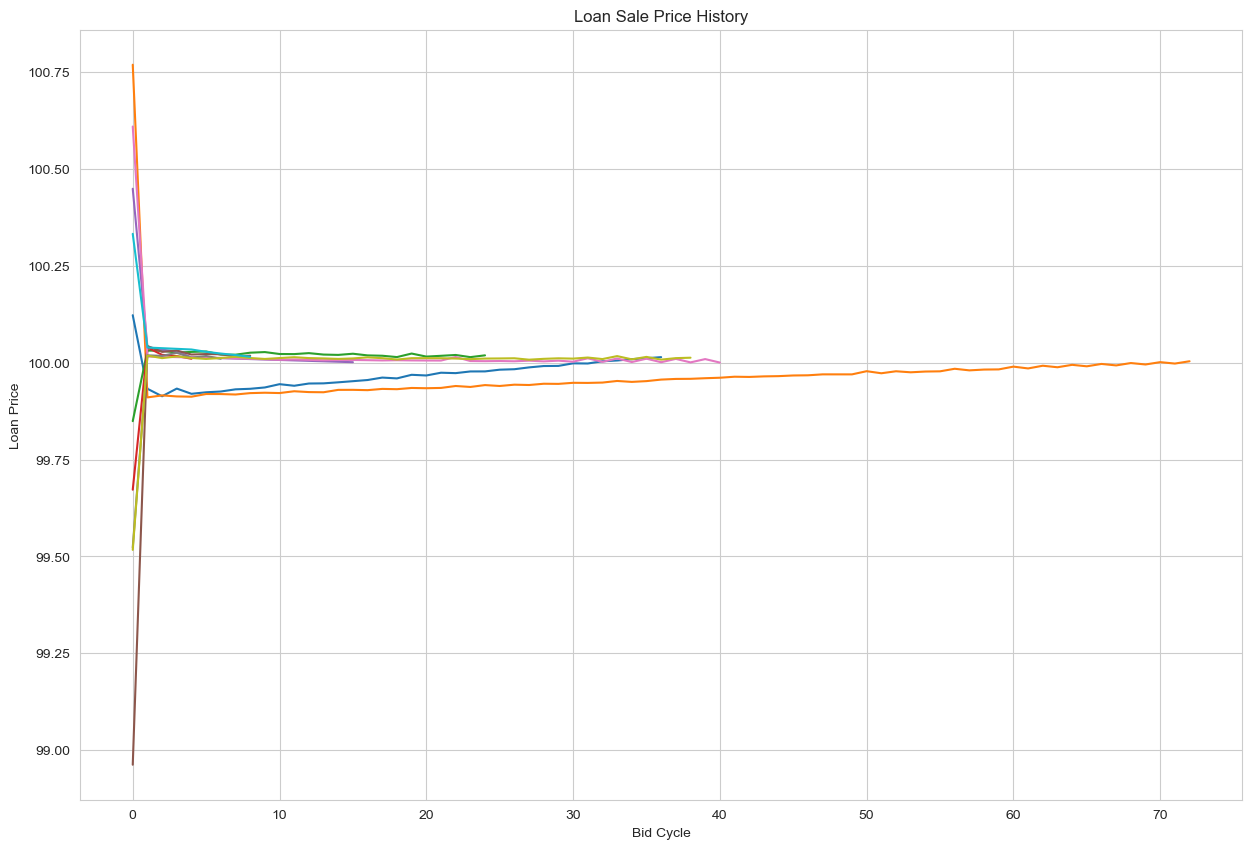

In [14]:
# Generating a plot similar to the above but for sale price history

plt.figure(figsize=(15, 10))
for i, sublist in enumerate([loan.sale_price_history for loan in loans_list]):
    plt.plot(sublist, label=f'Series {i + 1}')

plt.title("Loan Sale Price History")
plt.xlabel("Bid Cycle")
plt.ylabel("Loan Price")
plt.show()


## Capital Generation Across Updates with Trading

Text(0, 0.5, 'Revenue')

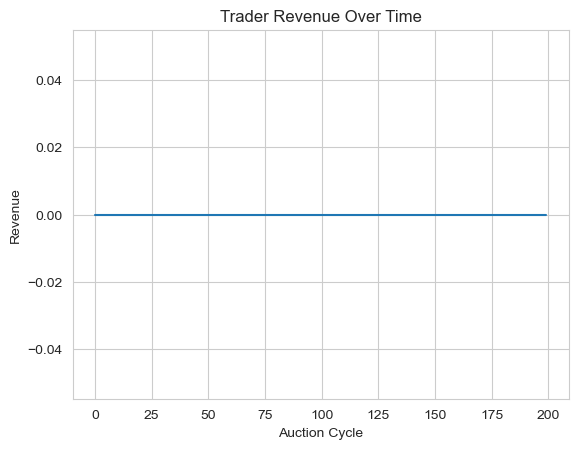

In [15]:
num_loans = 1000
num_investors = 100
trader = LoanTrader.LoanTraderObj(max_investors=100)

# setting up a universe of loans and investors and randomly allocating them
loans_list = [Loan.LoanObj() for _ in range(num_loans)]
investors_list = [LoanInvestor.LoanInvestorObj() for _ in range(num_investors)]

# randomly allocating loans to investors
for investor in investors_list:
    available_loans = [loan for loan in loans_list if loan.current_owner == "no owner"]
    investor.initialize_portfolio(available_loans)

# setting up all the investors to have our trader as their trader
trader.add_investors(investors_list)

trader_revenue = []

for _ in range(200):
    for investor in investors_list:
        investor.update(cycle=_)
    for loan in loans_list:
        loan.update(current_cycle=_)
        
    trader_revenue.append(sum(trader.revenue_history))

    trader.update(cycle=_, num_investors=25)

plt.plot(trader_revenue, label="Trader Revenue")
plt.title("Trader Revenue Over Time")
plt.xlabel("Auction Cycle")
plt.ylabel("Revenue")

Text(0, 0.5, 'Capital')

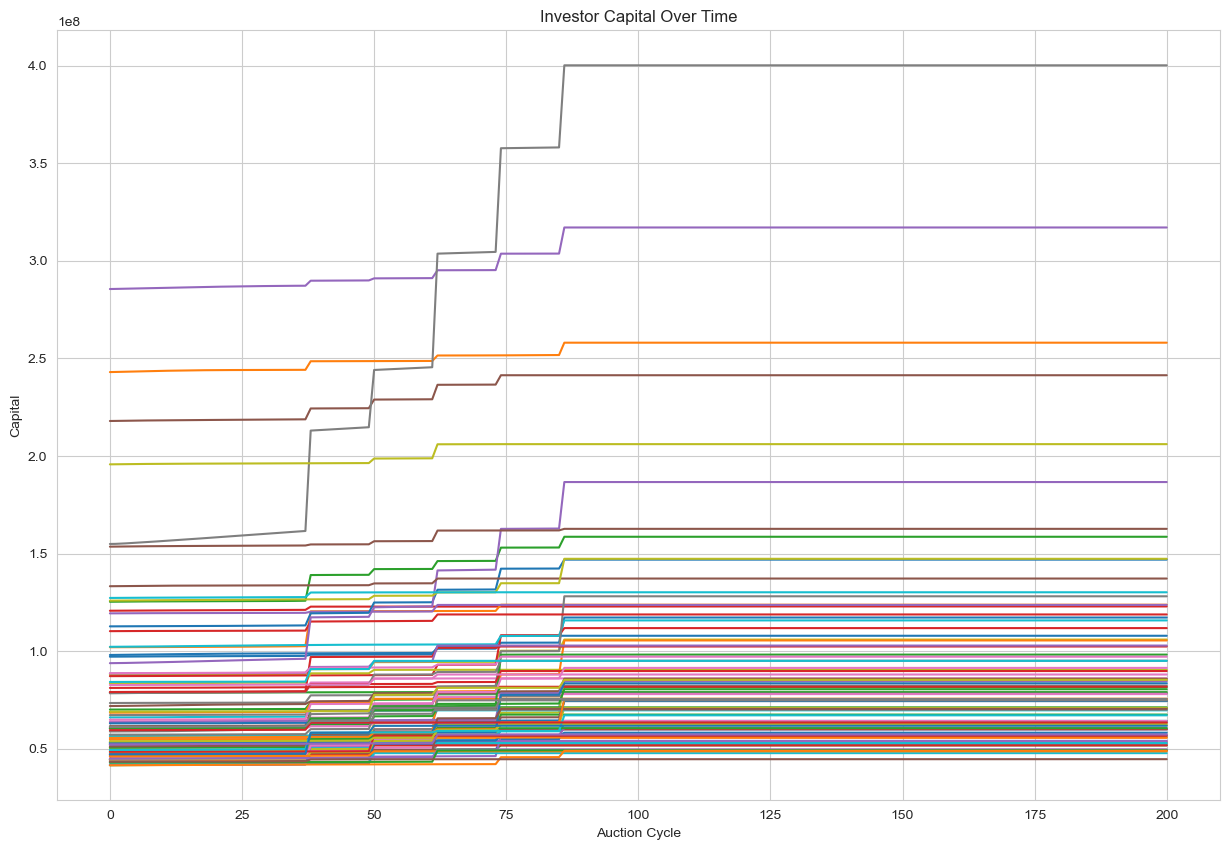

In [16]:
# Plotting
plt.figure(figsize=(15, 10))

# plotting each investors capital history
for investor in investors_list:
    plt.plot(investor.capital_history)
plt.title("Investor Capital Over Time")
plt.xlabel("Auction Cycle")
plt.ylabel("Capital")